In [2]:
#setup
import numpy as np
import random
import pandas as pd
import random

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

from sklearn import decomposition, datasets

## Zadanie 1. (4 punkty)
a) Utwórz zestaw danych X składający się z 1000 wektorów dwuwymiarowych xi = (x1i,
x2i)T, dla i = 1, 2, ..., 1000, wygenerowanych losowo przy użyciu dwuwymiarowego
rozkładu normalnego o średniej [3, 5] i macierzy kowariancji [12, 3; 3, 1].

b) Ustandaryzuj dane, tak aby średnia dla każdego z wymiarów wynosiła 0, a wariancja 1.
Ustandaryzowane dane oznaczmy przez X
(0)

c) Policz macierz kowariancji S ustandaryzowanego zestawu danych X
(0)
.

In [3]:
mean = np.array([3, 5])
cov = [[12, 3], [3, 1]]

X = np.random.multivariate_normal(mean, cov, 1000)
X_std = (X - np.mean(X, axis=0)) / np.std(X, axis=0)
S = np.cov(X_std.T)
np.mean(X_std, axis=0), np.var(X_std, axis=0)

(array([-1.91180405e-16, -8.37663272e-17]), array([1., 1.]))

d) Wyznacz wartości własne λ1 iλ2 oraz odpowiadające im wektory własne v1 i v2
macierzy kowariancji S. Dla ustalenia notacji, wartości własne porządkujemy malejąco,
tzn. λ1 > λ2.

e) Wyznacz składowe główne zestawu danych, tzn. dla każdego punktu danych xi(0)
wyznacz punkt yi = (1/sqrt(λ1) v1 xi , 1/sqrt(λ2) v2 xi). Odpowiada to zrzutowaniu
punktu xi(0) na osie nowego układu współrzędnych wyznaczonego przez wektory własne macierzy S i przeskalowaniu przez pierwiastki z wartości własnych.

In [5]:
eigval, eigvec = np.linalg.eig(S)
order = eigval.argsort()[::-1]
eigval = eigval[order]
eigvec = eigvec[:,order]

print(f'Eigenvalues:{eigval}\nEigenvectors:\n{eigvec}')

Eigenvalues:[1.86121519 0.14078681]
Eigenvectors:
[[ 0.70710678 -0.70710678]
 [ 0.70710678  0.70710678]]


In [6]:
X_PCA = np.dot(X_std, np.dot(eigvec, np.diag(1 / np.sqrt(eigval))))
X_PCA

array([[-0.75172503,  0.0307577 ],
       [-0.96214908,  1.63021883],
       [ 0.30731069, -1.73578899],
       ...,
       [-0.64650368,  1.34914932],
       [ 0.12245514,  0.31599119],
       [ 0.18053516, -0.32773563]])

f) Zrób rysunki pokazujące oryginalny zbiór danych (punkty xi), zbiór danych po standaryzacji (punkty xi(0)) i zbioru danych po przekształceniu PCA (punkty yi). Na rysunkach z punktami xi i xi(0) narysuj proste zawierające osie główne elipsy wyznaczanej przez punkty danych.

g) Sprawdź charakterystykę statystyczną (średnią, wariancję, macierz kowariancji i macierz korelacji) oryginalnego zbioru danych, zbioru danych po standaryzacji i zbioru danych po przekształceniu PCA.

In [7]:
def plot_data(title, data, is_pca=False):
    plt.figure()
    plt.xlim(min(data[:,0]), max(data[:, 0]))
    plt.ylim(min(data[:,1]), max(data[:, 1]))
    plt.axis('scaled')
    plt.title(title)
    plt.scatter(x=data[:, 0], y=data[:, 1], s=10)
    
    if not is_pca:
        x11 = data.mean(axis=0)[0] - mean[1] * eigvec[0][0] * data.std(axis=0)[0]
        y11 = data.mean(axis=0)[0] + mean[1] * eigvec[0][0] * data.std(axis=0)[0]
        x12 = data.mean(axis=0)[1] - mean[1] * eigvec[0][1] * data.std(axis=0)[1]
        y12 = data.mean(axis=0)[1] + mean[1] * eigvec[0][1] * data.std(axis=0)[1]

        x21 = data.mean(axis=0)[0] - mean[1] * eigvec[1][0] * data.std(axis=0)[0]
        y21 = data.mean(axis=0)[0] + mean[1] * eigvec[1][0] * data.std(axis=0)[0]
        x22 = data.mean(axis=0)[1] - mean[1] * eigvec[1][1] * data.std(axis=0)[1]
        y22 = data.mean(axis=0)[1] + mean[1] * eigvec[1][1] * data.std(axis=0)[1]
        
        plt.plot([x11, y11], [x12, y12], c='r')
        plt.plot([x21, y21], [x22, y22], c='r')

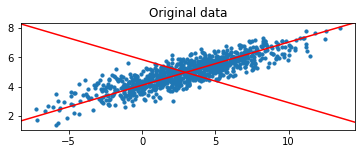

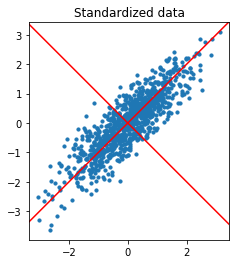

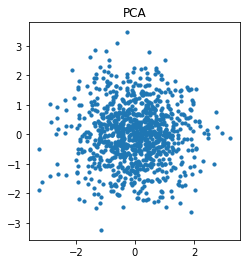

In [8]:
plot_data('Original data', X)
plot_data('Standardized data', X_std)
plot_data('PCA', X_PCA, is_pca=True)

In [10]:
def print_stats(data_title, data):
    print(f'{data_title}\nmean:{np.mean(data, axis=0)}\ncovariance:\n{np.cov(data.T)}\ncorrelation matrix: \n{np.corrcoef(data.T)}\n\n')

print_stats('Original Data', X)
print_stats('Standardized Data', X_std)
print_stats('PCA Data', X_PCA)

Original Data
mean:[2.97894807 4.97494236]
covariance:
[[11.25082602  2.84452787]
 [ 2.84452787  0.97384939]]
correlation matrix: 
[[1.         0.85935398]
 [0.85935398 1.        ]]


Standardized Data
mean:[-1.91180405e-16 -8.37663272e-17]
covariance:
[[1.001001   0.86021419]
 [0.86021419 1.001001  ]]
correlation matrix: 
[[1.         0.85935398]
 [0.85935398 1.        ]]


PCA Data
mean:[-1.97619698e-17  2.85715895e-16]
covariance:
[[1.00000000e+00 2.11598062e-16]
 [2.11598062e-16 1.00000000e+00]]
correlation matrix: 
[[1.00000000e+00 2.11598062e-16]
 [2.11598062e-16 1.00000000e+00]]




h) Wyjaśnij dlaczego licząc punkty yi dzielimy przez pierwiastki z wartości własnych. Jak wyglądałyby wyniki f) i g), gdybyśmy nie wykonywali tego dzielenia?

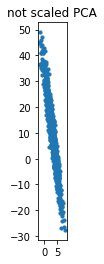

In [11]:
not_scaled_pca = np.dot(X, np.dot(eigvec, np.diag(1 / eigval)))
plot_data('not scaled PCA', not_scaled_pca, is_pca=True)

In [12]:
print_stats('not scaled PCA data', not_scaled_pca)
print_stats('scaled PCA data', X_PCA)

not scaled PCA data
mean:[ 3.02181601 10.02495248]
covariance:
[[  2.58560917 -19.60996468]
 [-19.60996468 164.86665581]]
correlation matrix: 
[[ 1.         -0.94979298]
 [-0.94979298  1.        ]]


scaled PCA data
mean:[-1.97619698e-17  2.85715895e-16]
covariance:
[[1.00000000e+00 2.11598062e-16]
 [2.11598062e-16 1.00000000e+00]]
correlation matrix: 
[[1.00000000e+00 2.11598062e-16]
 [2.11598062e-16 1.00000000e+00]]




i) Powtórz wszystkie powyższe obliczenia dla zestawu danych X składającego się z 1000 wektorów dwuwymiarowych xi = (x1i, x2i)T, dla i = 1, 2, ..., 1000, wygenerowanych losowo przy użyciu mieszaniny trzech rozkładów normalnych o średnich [-21, -2], [3, 5], [27, 12], macierzy kowariancji [12, 3; 3, 1] takiej samej dla wszystkich trzech rozkładów oraz wag równych dla wszystkich trzech rozkładów wynoszących 1/3.

In [14]:
means = [[-21, -2], [3, 5], [27, 12]]
cov = [[12, 3], [3, 1]]

# a)
X2 = np.array([np.random.multivariate_normal(means[random.randint(0, 2)], cov) 
               for _ in range(1000)])

# b)
X2_std = (X2 - X2.mean(axis=0)) / X2.std(axis=0)

# c)
sigma_std2 = np.cov(X2_std.T)
print(f'Cov matrix for not scaled:\n{sigma_std2}')
print(f'Cov matrix for scaled:\n{np.cov(X.T)}\n')

# d)
eigval2, eigvec2 = np.linalg.eig(sigma_std2)
order = eigval2.argsort()[::-1]
eigval2 = eigval2[order]
eigvec2 = eigvec2[:,order]

print(f'For scaled:\nEigenvalues: {eigval}\nEigenvectors:\n{eigvec}\n')
print(f'For not scaled:\nEigenvalues: {eigval2}\nEigenvectors:\n{eigvec2}')

# e)
X2_pca = np.dot(X2_std, np.dot(eigvec2, np.diag(1 / np.sqrt(eigval2))))

Cov matrix for not scaled:
[[1.001001   0.99686754]
 [0.99686754 1.001001  ]]
Cov matrix for scaled:
[[11.25082602  2.84452787]
 [ 2.84452787  0.97384939]]

For scaled:
Eigenvalues: [1.86121519 0.14078681]
Eigenvectors:
[[ 0.70710678 -0.70710678]
 [ 0.70710678  0.70710678]]

For not scaled:
Eigenvalues: [1.99786854 0.00413346]
Eigenvectors:
[[ 0.70710678 -0.70710678]
 [ 0.70710678  0.70710678]]


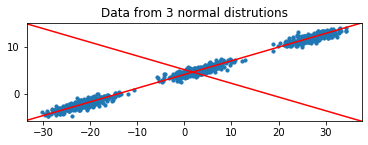

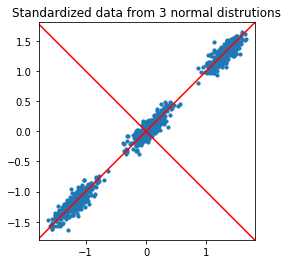

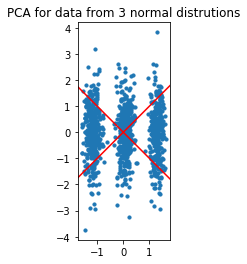

In [15]:
# f)
plot_data('Data from 3 normal distrutions', X2)
plot_data('Standardized data from 3 normal distrutions', X2_std)
plot_data('PCA for data from 3 normal distrutions', X2_pca)

j) Powtórz b), c), d) i e) dla zestawu danych IRIS. Zrób dwuwymiarowy rysunek ilustrujący
zbiór danych IRIS wykreślając na osi x pierwszą składową główną y1i, a na osi y2i drugą
składową główną każdego punktu xi.

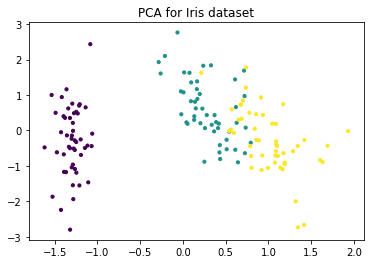

In [16]:
data = datasets.load_iris()['data']
targets = datasets.load_iris()['target']

# b)
data_std = (data - np.mean(data, axis=0)) / np.std(data, axis=0)

# c)
S = np.cov(data_std.T)

# d)
eigval_iris, eigvec_iris = np.linalg.eig(S)
order = eigval_iris.argsort()[::-1]
eigval_iris = eigval_iris[order]
eigvec_iris = eigvec_iris[:,order]

# e)
iris_pca = np.dot(data_std, np.dot(eigvec_iris, np.diag(1 / np.sqrt(eigval_iris))))

plt.title('PCA for Iris dataset')
plt.scatter(iris_pca[:, 0], iris_pca[:, 1], s=10, c=targets)

k) Dla zestawu danych IRIS, spróbuj odtworzyć oryginalne punkty danych xi z danych
zredukowanych do dwóch składowych głównych, tzn. z dwuwymiarowych punktów [y1i, T
y2i] . Policz średniokwadratowy błąd odtworzenia, tzn. sumę kwadratów odległości między oryginalnym punktem danych a odtworzonym punktem danych.

l) Jakie znaczenie ma suma wartości własnych macierzy kowariancji S, które zostały użyte do konstrukcji danych zredukowanych?

In [62]:
iris_reduced = iris_pca[:, :2]

In [90]:
reconstructed = np.zeros(data.shape)
reconstructed[:, :2] += iris_reduced

In [91]:
reconstructed = np.dot(reconstructed, eigvec_iris) + np.mean(data, axis=0)

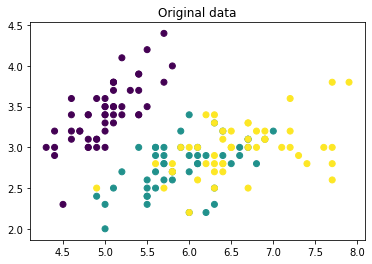

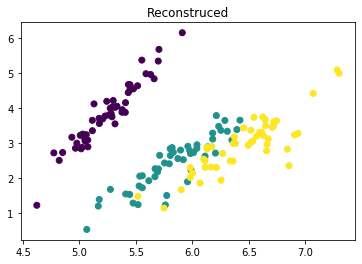

In [92]:
def scatter_iris(title, data):
    plt.figure()
    plt.title(title)
    plt.scatter(data[:, 0], data[:, 1], c=targets)

scatter_iris('Original data', data)
scatter_iris('Reconstruced', reconstructed)

In [93]:
print(f'Mean squared error for reconstruced data: {np.mean((data - reconstructed)**2)}')

Mean squared error for reconstruced data: 1.7196556676036163
